In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
from string import punctuation
import seaborn as sns; sns.set()

In [2]:
apple = pd.read_csv('Apple_Review_R0_V7.csv')
samsung = pd.read_csv('Samsung_Review_R0_V7.csv')

In [3]:
# Drop null values
print("Apple")
print(apple.isnull().sum())
apple.dropna(inplace=True)
print("")
print("Samsung")
print(samsung.isnull().sum())
samsung.dropna(inplace=True)

Apple
Unnamed: 0      0
Brand Name      0
Rating          0
Reviews         0
Review Votes    0
Review_good     0
dtype: int64

Samsung
Unnamed: 0      0
Brand Name      0
Rating          0
Reviews         0
Review Votes    0
Review_good     0
dtype: int64


In [4]:
print(apple.shape)
print(samsung.shape)

(31221, 6)
(35095, 6)


In [7]:
apple.head(2)

,Unnamed: 0,Brand Name,Rating,Reviews,Review Votes,Review_good
0,6921,Apple,4,So far the iPhone 4 from this seller has been ...,0.0,0
1,6922,Apple,1,It didn't come with all the things it said was...,2.0,0


In [9]:
samsung.head(2)

,Unnamed: 0,Brand Name,Rating,Reviews,Review Votes,Review_good
0,0,Samsung,5,I feel so LUCKY to have found this used (phone...,1.0,0
1,1,Samsung,4,"nice phone, nice up grade from my pantach revu...",0.0,0


/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:23:57.336993. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


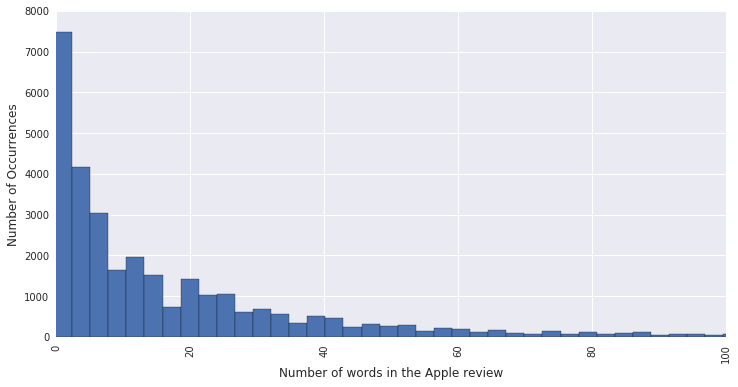

count    31221.000000
mean        23.627719
std         60.368242
min          1.000000
25%          4.000000
50%         11.000000
75%         27.000000
max       1622.000000
Name: num_of_words, dtype: float64


In [36]:
# Apple
apple["num_of_words"] = apple["Reviews"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,6), facecolor = None)
plt.hist(apple["num_of_words"], bins = 600, edgecolor = 'k', align='left', rdwidth = 1)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the Apple review', fontsize=12)
plt.axis([0, 100, 0, 8000])
plt.xticks(rotation='vertical')
plt.show()

print(apple["num_of_words"].describe())

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


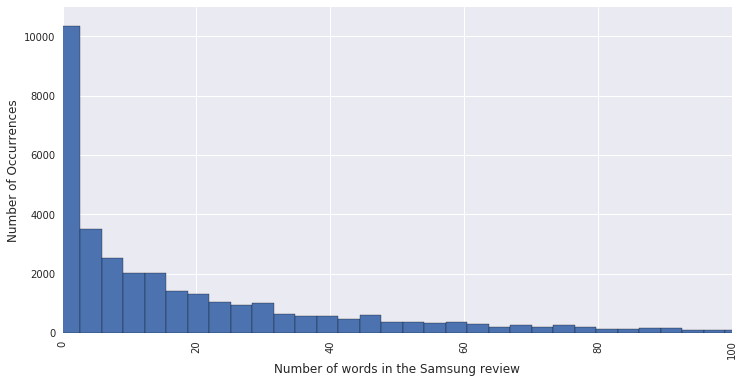

count    35095.000000
mean        32.078216
std         69.281008
min          1.000000
25%          3.000000
50%         12.000000
75%         34.000000
max       2570.000000
Name: num_of_words, dtype: float64


In [12]:
# Samsung
samsung["num_of_words"] = samsung["Reviews"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12,6))
plt.hist(samsung["num_of_words"], bins = 800, edgecolor = 'k', align='left', rwidth=1)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of words in the Samsung review', fontsize=12)
plt.axis([0,100, 0, 11000])
plt.xticks(rotation='vertical')
plt.show()

print(samsung["num_of_words"].describe())

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


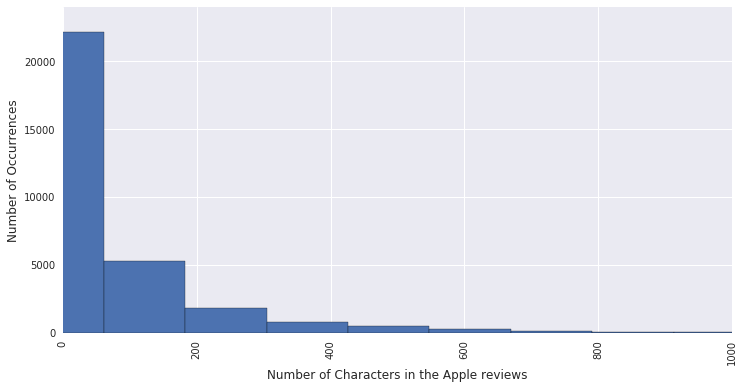

count    31221.000000
mean       126.131194
std        332.195028
min          1.000000
25%         21.000000
50%         57.000000
75%        141.000000
max       9114.000000
Name: num_of_chars, dtype: float64


In [16]:
# apple
apple["num_of_chars"] = apple["Reviews"].apply(lambda x: len(str(x)))

plt.figure(figsize=(12,6))
plt.hist(apple["num_of_chars"], bins = 75, edgecolor = 'k', align='left', rwidth=1)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Characters in the Apple reviews', fontsize=12)
plt.axis([0,1000, 0, 24000])
plt.xticks(rotation='vertical')
plt.show()

print(apple["num_of_chars"].describe())

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


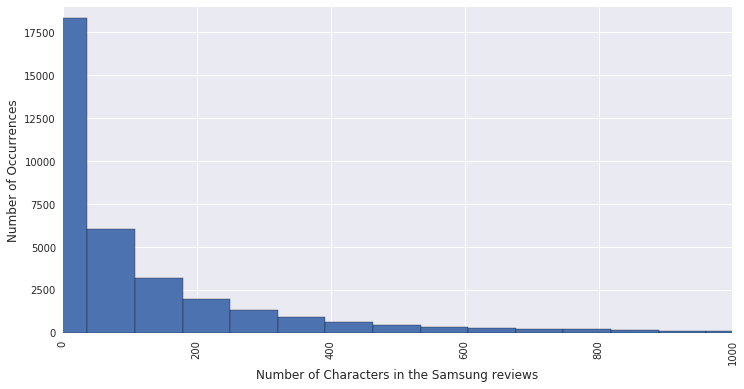

count    35095.000000
mean       172.042542
std        374.172036
min          1.000000
25%         19.000000
50%         66.000000
75%        181.000000
max      14222.000000
Name: num_of_chars, dtype: float64


In [19]:
# Samsung
samsung["num_of_chars"] = samsung["Reviews"].apply(lambda x: len(str(x)))

plt.figure(figsize=(12,6))
plt.hist(samsung["num_of_chars"], bins = 200, edgecolor = 'k', align='left', rwidth=1)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Characters in the Samsung reviews', fontsize=12)
plt.axis([0,1000, 0, 19000])
plt.xticks(rotation='vertical')
plt.show()

print(samsung["num_of_chars"].describe())

# Import NLTK and LDA

In [32]:
import string
from nltk.tokenize import RegexpTokenizer
english_stemmer = nltk.stem.SnowballStemmer('english')
stopwords = nltk.corpus.stopwords.words('english')
from gensim import corpora, models
import pyLDAvis.gensim

# Apple

In [25]:
apple['Reviews'] = [r.lower() for r in apple['Reviews']]

apple_texts = []
for doc in apple['Reviews']:
    tokens = nltk.word_tokenize(doc)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stopped_tokens = [token for token in tokens if not token in stopwords]
    stemmed_tokens = [english_stemmer.stem(token) for token in stopped_tokens]
    tokens_after_filterby_length = [token for token in stemmed_tokens if len(token)>1]
    apple_texts.append(tokens_after_filterby_length)

In [26]:
apple_dictionary = corpora.Dictionary(apple_texts)

In [27]:
apple_corpus = [apple_dictionary.doc2bow(text) for text in apple_texts]

In [28]:
print(apple_corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1)]


In [29]:
apple_ldamodel = models.ldamodel.LdaModel(apple_corpus, num_topics=8, id2word = apple_dictionary, passes=20)

In [30]:
for topic in apple_ldamodel.print_topics(8):
    print(topic)
    print("")

(0, '0.068*"new" + 0.049*"phone" + 0.037*"like" + 0.028*"look" + 0.025*"brand" + 0.024*"box" + 0.022*"came" + 0.019*"charger" + 0.017*"iphon" + 0.017*"scratch"')

(1, '0.098*"phone" + 0.032*"unlock" + 0.026*"appl" + 0.022*"activ" + 0.015*"verizon" + 0.013*"store" + 0.013*"use" + 0.013*"could" + 0.012*"seller" + 0.012*"would"')

(2, '0.087*"iphon" + 0.031*"sim" + 0.026*"card" + 0.025*"android" + 0.022*"plus" + 0.018*"get" + 0.017*"use" + 0.016*"phone" + 0.016*"version" + 0.015*"one"')

(3, '0.152*"great" + 0.125*"excel" + 0.068*"phone" + 0.058*"product" + 0.057*"nice" + 0.047*"describ" + 0.045*"thank" + 0.037*"love" + 0.032*"exact" + 0.020*"condit"')

(4, '0.038*"phone" + 0.017*"batteri" + 0.014*"day" + 0.014*"work" + 0.014*"screen" + 0.013*"use" + 0.013*"camera" + 0.011*"would" + 0.011*"charg" + 0.011*"even"')

(5, '0.085*"good" + 0.061*"phone" + 0.058*"work" + 0.055*"perfect" + 0.054*"great" + 0.022*"fast" + 0.021*"everyth" + 0.020*"love" + 0.018*"product" + 0.018*"condit"')

(6, '0.0

In [33]:
apple_vis = pyLDAvis.gensim.prepare(apple_ldamodel, apple_corpus, apple_dictionary)
pyLDAvis.display(apple_vis)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:19:37.468768. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]


# Samsung

In [37]:
samsung_texts = []
samsung['Reviews'] = [r.lower() for r in samsung['Reviews']]


for doc in samsung['Reviews']:
    tokens = nltk.word_tokenize(doc)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    stopped_tokens = [token for token in tokens if not token in stopwords]
    stemmed_tokens = [english_stemmer.stem(token) for token in stopped_tokens]
    tokens_after_filterby_length = [token for token in stemmed_tokens if len(token)>1]
    samsung_texts.append(tokens_after_filterby_length)    

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:29:08.949853. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [38]:
samsung_dictionary = corpora.Dictionary(samsung_texts)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:29:36.597395. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [39]:
samsung_corpus = [samsung_dictionary.doc2bow(text) for text in samsung_texts]

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:29:38.724540. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [40]:
samsung_ldamodel = models.ldamodel.LdaModel(samsung_corpus, num_topics=8, id2word = samsung_dictionary, passes=20)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:29:42.997813. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [41]:
for topic in samsung_ldamodel.print_topics(8):
    print(topic)
    print("")

(0, '0.143*"phone" + 0.104*"great" + 0.088*"excel" + 0.088*"love" + 0.033*"best" + 0.031*"nice" + 0.024*"awesom" + 0.023*"fast" + 0.023*"product" + 0.017*"amaz"')

(1, '0.316*"good" + 0.061*"product" + 0.039*"phone" + 0.028*"expect" + 0.020*"seller" + 0.020*"realli" + 0.014*"qualiti" + 0.013*"satisfi" + 0.012*"far" + 0.012*"cell"')

(2, '0.042*"phone" + 0.017*"use" + 0.015*"batteri" + 0.014*"screen" + 0.012*"like" + 0.011*"camera" + 0.010*"get" + 0.008*"app" + 0.008*"one" + 0.008*"better"')

(3, '0.084*"phone" + 0.019*"work" + 0.017*"one" + 0.015*"would" + 0.013*"charg" + 0.013*"charger" + 0.012*"buy" + 0.012*"use" + 0.012*"new" + 0.012*"get"')

(4, '0.065*"sim" + 0.046*"card" + 0.038*"phone" + 0.029*"version" + 0.027*"unlock" + 0.024*"intern" + 0.024*"work" + 0.022*"use" + 0.016*"us" + 0.016*"lte"')

(5, '0.058*"samsung" + 0.039*"phone" + 0.019*"work" + 0.017*"warranti" + 0.016*"month" + 0.013*"devic" + 0.012*"support" + 0.011*"amazon" + 0.011*"call" + 0.010*"problem"')

(6, '0.086*"w

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:45:21.926248. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)


In [43]:
samsung_vis = pyLDAvis.gensim.prepare(samsung_ldamodel, samsung_corpus, samsung_dictionary)
pyLDAvis.display(samsung_vis)

/home/ubuntu/anaconda3/lib/python3.6/site-packages/jupyter_client/jsonutil.py:67: DeprecationWarning: Interpreting naive datetime as local 2017-06-05 20:46:02.149380. Please add timezone info to timestamps.
  new_obj[k] = extract_dates(v)
/home/ubuntu/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  topic_term_dists = topic_term_dists.ix[topic_order]
